# Caso Práctico: Clasificación de imágenes

## 1. Conjunto de datos

In [1]:
from tensorflow.keras import datasets

In [2]:
fashion_mnist = datasets.fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## 2. Visualización del conjunto de datos

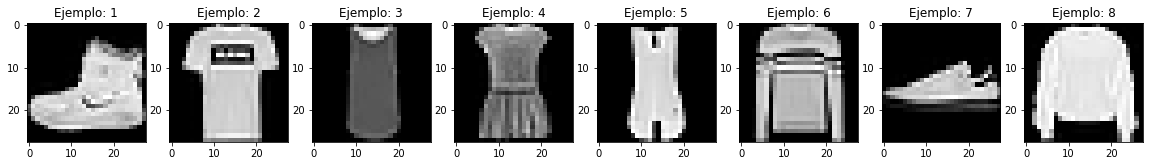

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, img in zip(range(1, 9), X_train[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

In [5]:
print("Longitud subconjunto de entrenamiento: ", len(X_train))
print("Longitud subconjunto de pruebas: ", len(X_test))

Longitud subconjunto de entrenamiento:  60000
Longitud subconjunto de pruebas:  10000


## 3. Transformación del conjunto de datos

In [6]:
X_train_prep = X_train.reshape((60000, 28*28))
X_test_prep = X_test.reshape((10000, 28*28))

In [8]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer()
X_train_prep = transformer.fit_transform(X_train_prep)
X_test_prep = transformer.transform(X_test_prep)

In [9]:
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)

## 4. Construcción del modelo

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [11]:
network.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy', 'Precision'])

In [12]:
history = network.fit(X_train_prep, 
                      y_train_prep,
                      batch_size=32,
                      epochs=3, 
                      validation_data=(X_test_prep, y_test_prep))

Epoch 1/3
1875/1875 [==============================] - 24s 11ms/step - loss: 0.5161 - accuracy: 0.8123 - precision: 0.8671 - val_loss: 0.4359 - val_accuracy: 0.8439 - val_precision: 0.8781
Epoch 2/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3708 - accuracy: 0.8634 - precision: 0.8903 - val_loss: 0.4071 - val_accuracy: 0.8485 - val_precision: 0.8790
Epoch 3/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3314 - accuracy: 0.8775 - precision: 0.9009 - val_loss: 0.3489 - val_accuracy: 0.8734 - val_precision: 0.8958
